In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [25]:
## load the data set
data = pd.read_csv('/content/bank-full.csv')

In [26]:
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
26373   30    technician    single  secondary      no     2153      no   no   
26374   45        admin.  divorced  secondary      no     8032      no   no   
26375   34  entrepreneur   married  secondary      no      455     yes   no   
26376   51   blue-collar   married  secondary      no     8180     yes   no   
26377   35    technician  divorced  secondary      no      127      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may     261.0       1.0   -1.0       0.0  unknown   no  
1        unknown    5   may     151.0       1.0   -1.0       0.0  unknown   no  
2        unknown    5   may      76.0       1.0   -1.0       0.0  unknown   no  
3        unknown    5   may      92.0       1.0   -1.0       0.0  unknown   no  
4        unknown    5   may     198.0       1.0   -1.0       0.0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
26373  telephone   20   nov      29.0       1.0   -1.0       0.0  unknown   no  
26374   cellular   20   nov      73.0       1.0   -1.0       0.0  unknown   no  
26375   cellular   20   nov      88.0       1.0   -1.0       0.0  unknown   no  
26376   cellular   20   nov      86.0       1.0   -1.0       0.0  unknown   no  
26377   cellular   20   NaN       NaN       NaN    NaN       NaN      NaN  NaN  

[26378 rows x 17 columns]

In [4]:
data.shape

(26378, 17)

In [5]:
data['poutcome']

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
26373    unknown
26374    unknown
26375    unknown
26376    unknown
26377        NaN
Name: poutcome, Length: 26378, dtype: object

In [6]:
unique_values = data['y'].unique()
print(unique_values)

['no' 'yes' nan]


In [7]:
unique_values = data['previous'].unique()
print(unique_values)

[ 0.  3.  1.  4.  2. 11. 16.  6.  5. 10. 12.  7. 18.  9. 21.  8. 14. 15.
 nan]


In [8]:
unique_values = data['pdays'].unique()
print(unique_values)

[ -1. 151. 166.  91.  86. 143. 147.  89. 140. 176. 101. 174. 170. 167.
 195. 165. 129. 188. 196. 172. 118. 119. 104. 171. 117. 164. 132. 131.
 123. 159. 186. 111. 115. 116. 173. 178. 110. 152.  96. 103. 150. 175.
 193. 181. 185. 154. 145. 138. 126. 180. 109. 158. 168.  97. 182. 127.
 130. 194. 125. 105. 102.  26. 179.  28. 183. 155. 112. 120. 137. 124.
 187. 190. 113. 162. 134. 169. 189.   8. 144. 191. 184. 177.   5.  99.
 133.  93.  92.  10. 100. 156. 198. 106. 153. 146. 128.   7. 121. 160.
 107.  90.  27. 197. 136. 139. 122. 157.  nan]


In [ ]:
unique_values = data['campaign'].unique()
print(unique_values)

[ 1.  2.  3.  5.  4.  6.  7.  8.  9. 10. 11. 12. 13. 19. 14. 24. 16. 32.
 18. 22. 15. 17. 25. 21. 43. 51. 63. 41. 26. 28. 55. 50. 38. 23. 20. 29.
 31. 37. 30. 46. 27. 58. 33. 35. 34. 36. 39. 44. nan]


In [ ]:
unique_values = data['contact'].unique()
print(unique_values)

['unknown' 'cellular' 'telephone']


In [ ]:
unique_values = data['education'].unique()
print(unique_values)

['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
unique_values = data['marital'].unique()
print(unique_values)

['married' 'single' 'divorced']


In [ ]:
unique_values = data['job'].unique()
print(unique_values)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [ ]:
#  code for unique value in categorical data
unique_values = data['poutcome'].unique()
print(unique_values)

['unknown' 'failure' 'other' 'success' nan]


In [29]:
data.tail()

age           job   marital  education default  balance housing loan  \
26372   34  entrepreneur   married   tertiary      no     7962     yes   no   
26373   30    technician    single  secondary      no     2153      no   no   
26374   45        admin.  divorced  secondary      no     8032      no   no   
26375   34  entrepreneur   married  secondary      no      455     yes   no   
26376   51   blue-collar   married  secondary      no     8180     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  
26372   cellular   20   nov      96.0       2.0   -1.0       0.0  unknown  no  
26373  telephone   20   nov      29.0       1.0   -1.0       0.0  unknown  no  
26374   cellular   20   nov      73.0       1.0   -1.0       0.0  unknown  no  
26375   cellular   20   nov      88.0       1.0   -1.0       0.0  unknown  no  
26376   cellular   20   nov      86.0       1.0   -1.0       0.0  unknown  no

In [27]:
data = data.dropna()

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


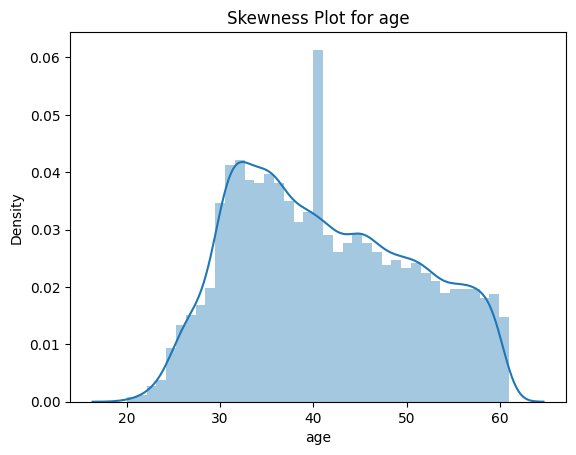

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


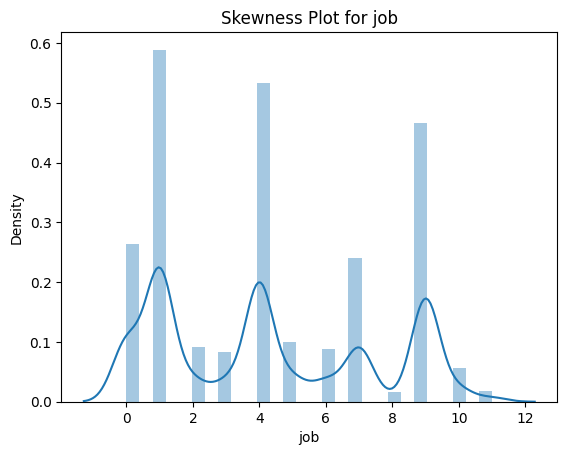

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


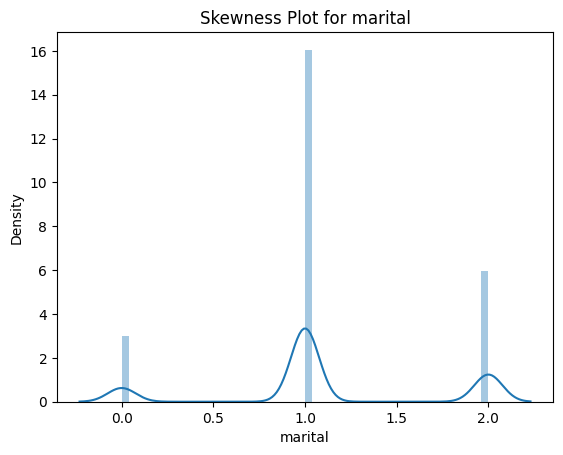

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


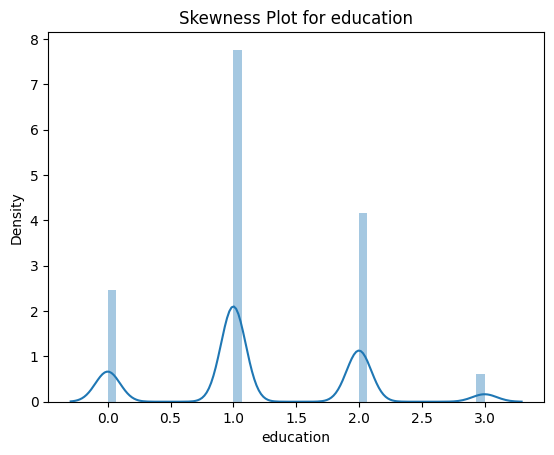

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


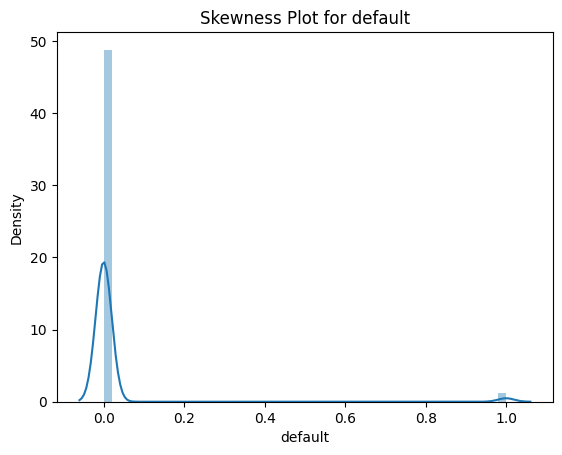

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


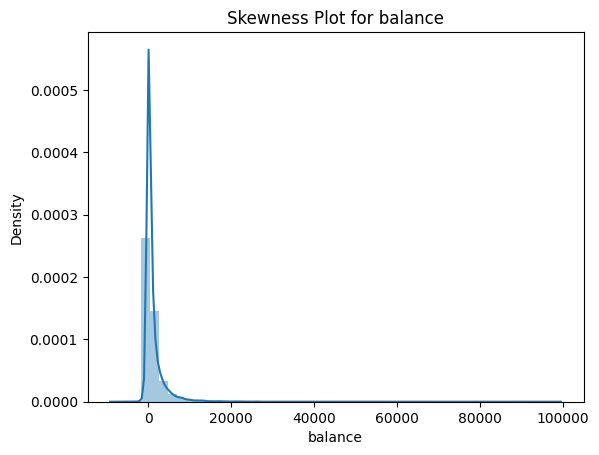

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


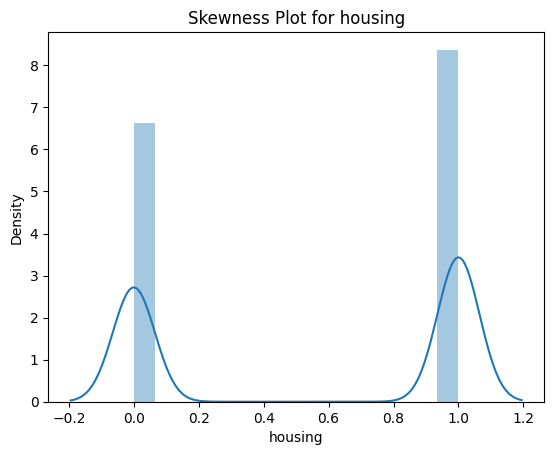

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


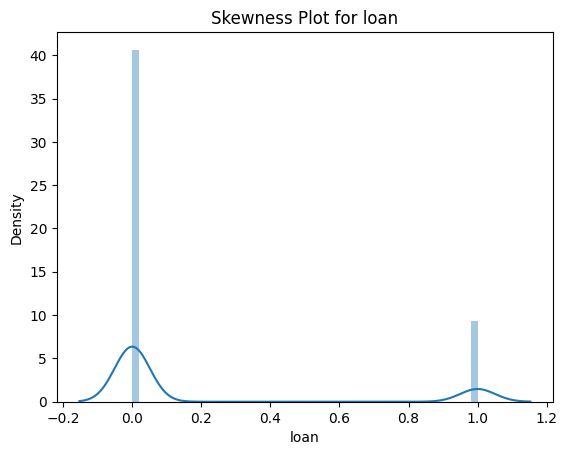

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


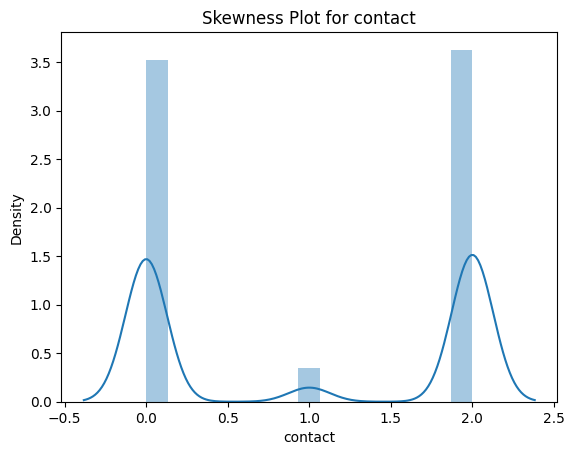

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


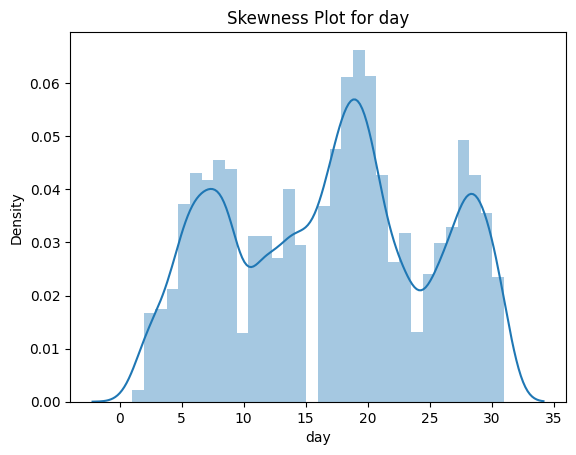

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


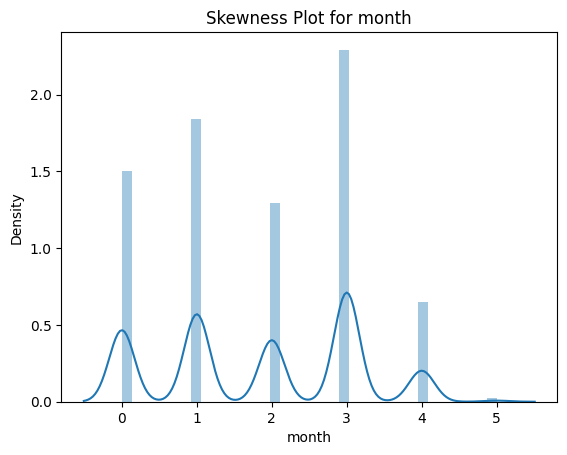

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


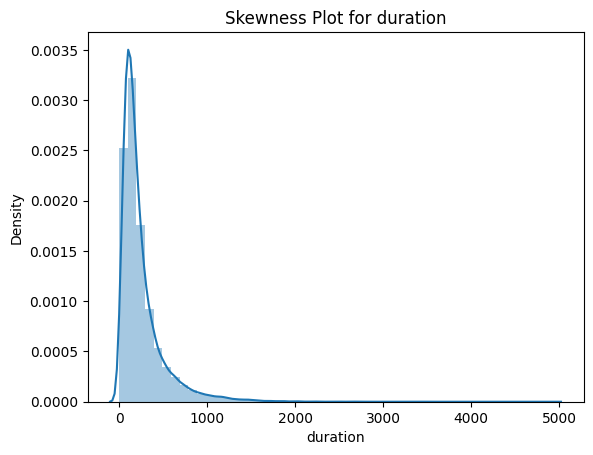

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


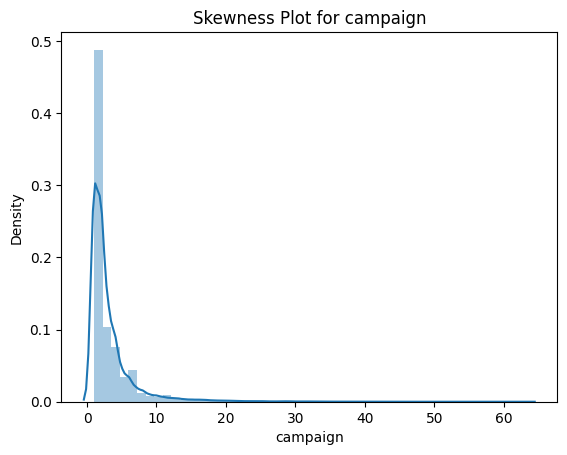

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


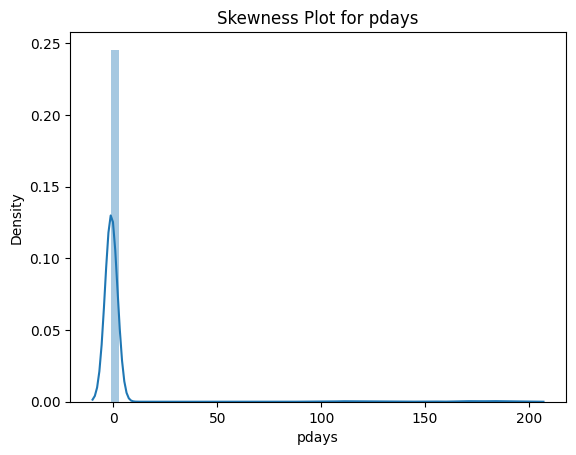

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


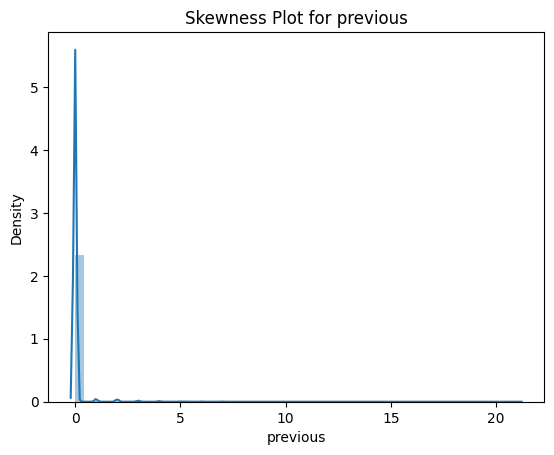

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


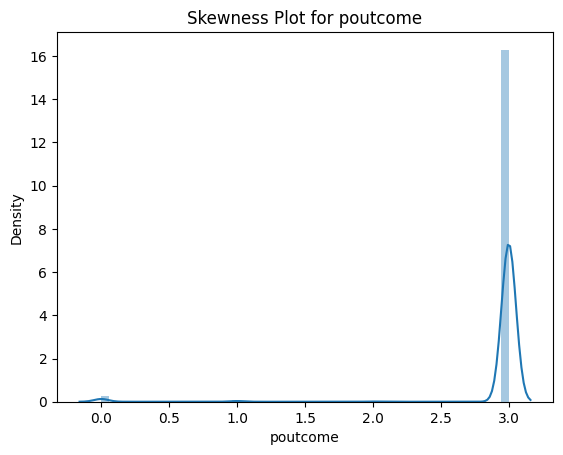

<ipython-input-54-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


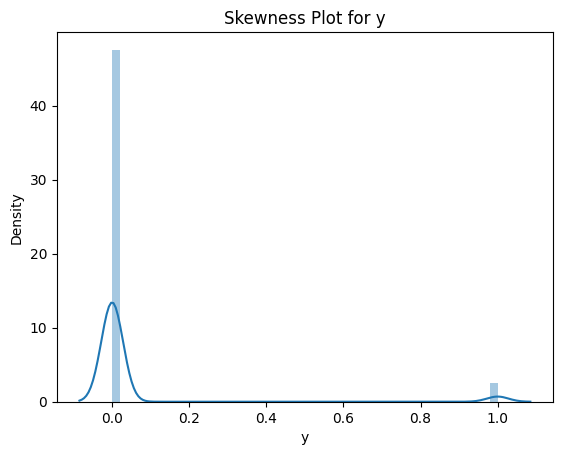

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot the skewness of each numeric column
for col in numeric_columns:
  plt.figure()
  sns.distplot(data[col])
  plt.title('Skewness Plot for ' + col)
  plt.show()

In [28]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

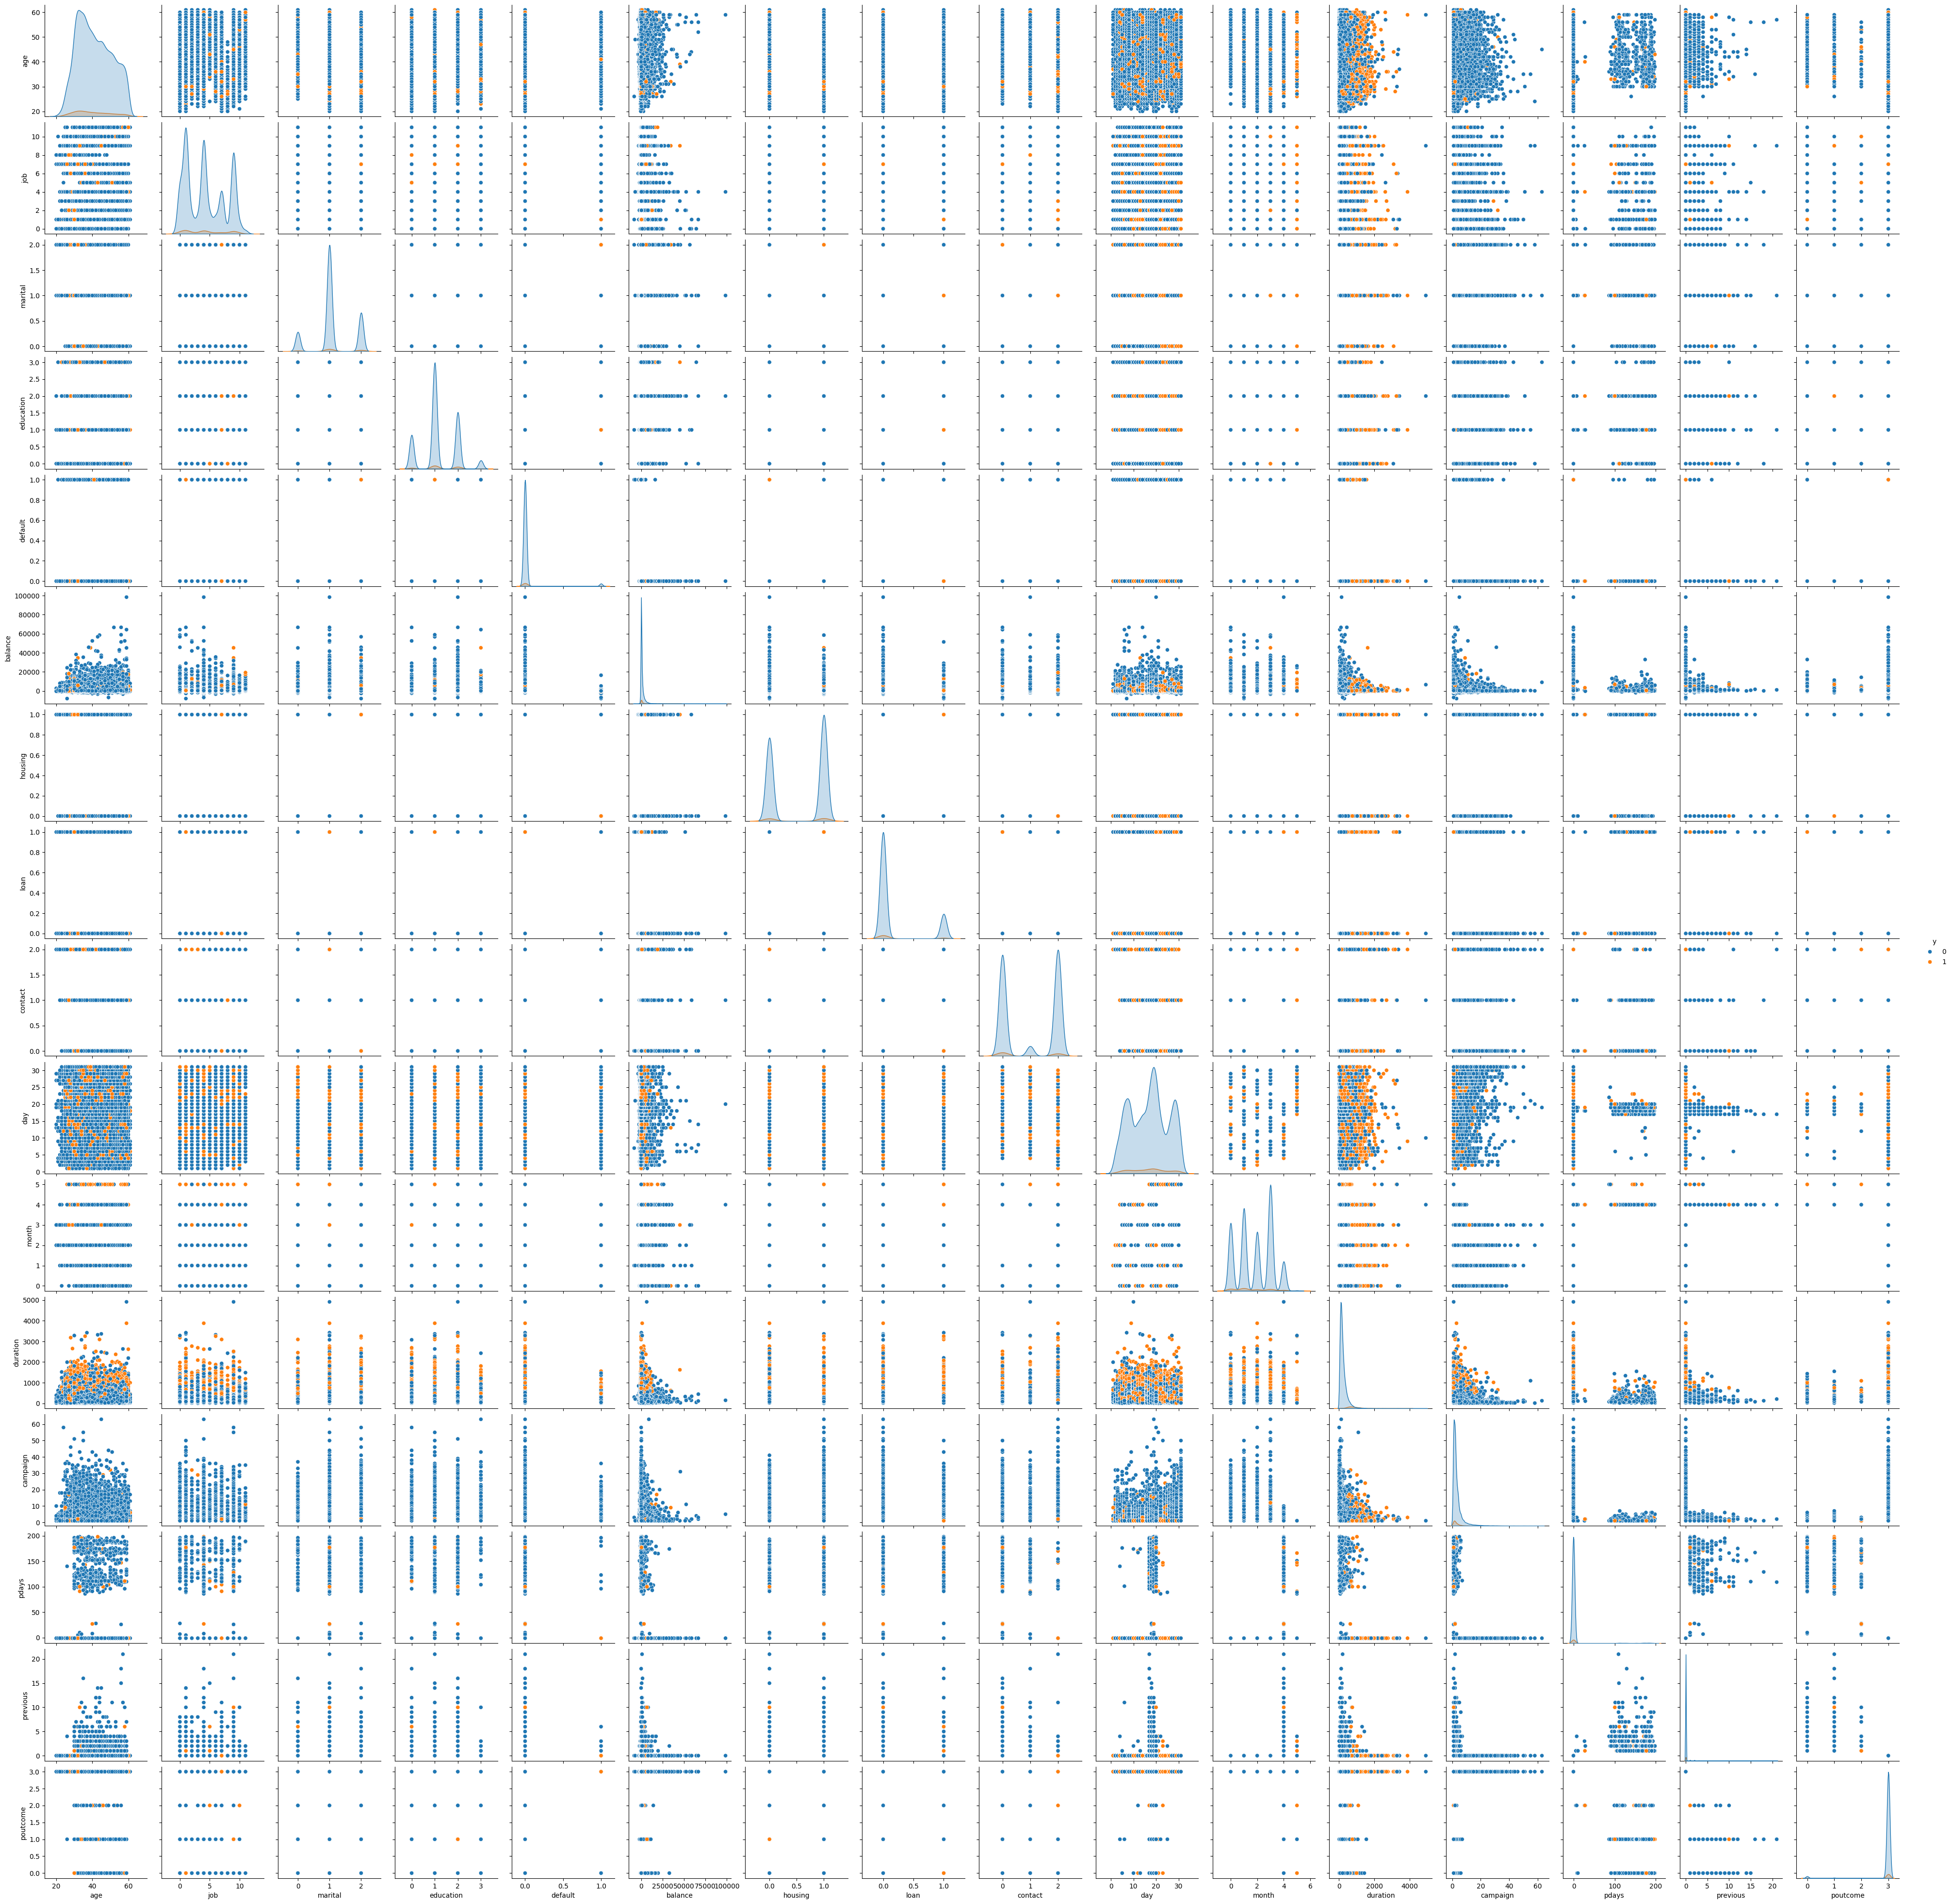

In [20]:
import seaborn as sns

sns.pairplot(data, hue='y')


In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083496 -0.032713 -0.045524 -0.003805  0.008558  0.015806
balance   0.083496  1.000000 -0.004810  0.015801 -0.008158  0.039330  0.027853
day      -0.032713 -0.004810  1.000000 -0.047002  0.203818  0.022739  0.015430
duration -0.045524  0.015801 -0.047002  1.000000 -0.086663 -0.012437 -0.007738
campaign -0.003805 -0.008158  0.203818 -0.086663  1.000000 -0.064855 -0.045264
pdays     0.008558  0.039330  0.022739 -0.012437 -0.064855  1.000000  0.689949
previous  0.015806  0.027853  0.015430 -0.007738 -0.045264  0.689949  1.000000

<ipython-input-10-d824a4fee92e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


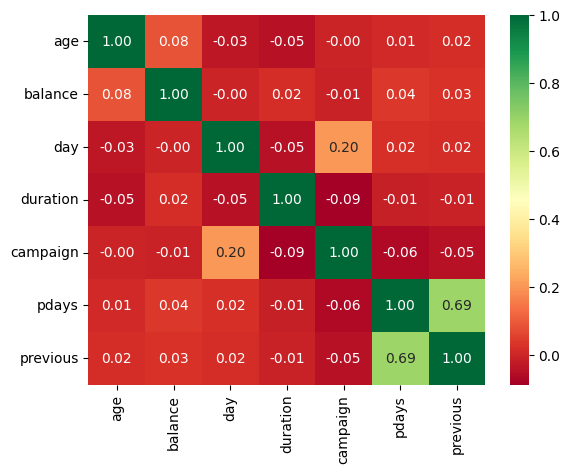

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in data.select_dtypes(include='object'):
    data[column] = le.fit_transform(data[column])

data.head()

<ipython-input-30-586753b297d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-30-586753b297d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-30-586753b297d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      3     261.0       1.0   -1.0       0.0         3  0  
1    5      3     151.0       1.0   -1.0       0.0         3  0  
2    5      3      76.0       1.0   -1.0       0.0         3  0  
3    5      3      92.0       1.0   -1.0       0.0         3  0  
4    5      3     198.0       1.0   -1.0       0.0         3  0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26377 entries, 0 to 26376
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        26377 non-null  int64  
 1   job        26377 non-null  int64  
 2   marital    26377 non-null  int64  
 3   education  26377 non-null  int64  
 4   default    26377 non-null  int64  
 5   balance    26377 non-null  int64  
 6   housing    26377 non-null  int64  
 7   loan       26377 non-null  int64  
 8   contact    26377 non-null  int64  
 9   day        26377 non-null  int64  
 10  month      26377 non-null  int64  
 11  duration   26377 non-null  float64
 12  campaign   26377 non-null  float64
 13  pdays      26377 non-null  float64
 14  previous   26377 non-null  float64
 15  poutcome   26377 non-null  int64  
 16  y          26377 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 3.6 MB


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

age       job  marital  education  default   balance  housing  loan  \
0  0.926829  0.363636      0.5   0.666667      0.0  0.095475      1.0   0.0   
1  0.585366  0.818182      1.0   0.333333      0.0  0.075614      1.0   0.0   
2  0.317073  0.181818      0.5   0.333333      0.0  0.075360      1.0   1.0   
3  0.658537  0.090909      0.5   1.000000      0.0  0.089490      1.0   0.0   
4  0.317073  1.000000      1.0   1.000000      0.0  0.075350      0.0   0.0   

   contact       day  month  duration  campaign  pdays  previous  poutcome  \
0      1.0  0.133333    0.6  0.053070       0.0    0.0       0.0       1.0   
1      1.0  0.133333    0.6  0.030704       0.0    0.0       0.0       1.0   
2      1.0  0.133333    0.6  0.015453       0.0    0.0       0.0       1.0   
3      1.0  0.133333    0.6  0.018707       0.0    0.0       0.0       1.0   
4      1.0  0.133333    0.6  0.040260       0.0    0.0       0.0       1.0   

     y  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

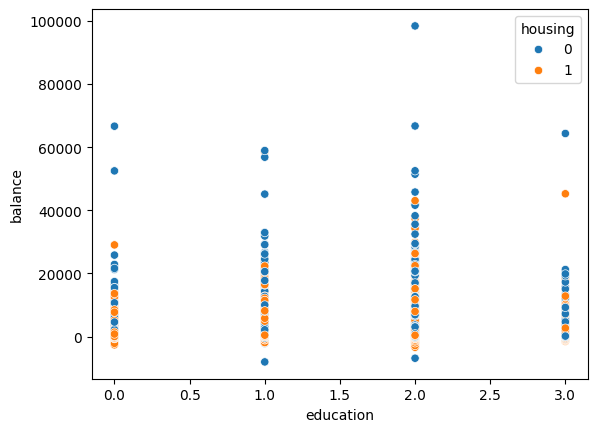

In [32]:
sns.scatterplot(x="education", y="balance", hue="housing", data=data, legend="brief")
plt.show()

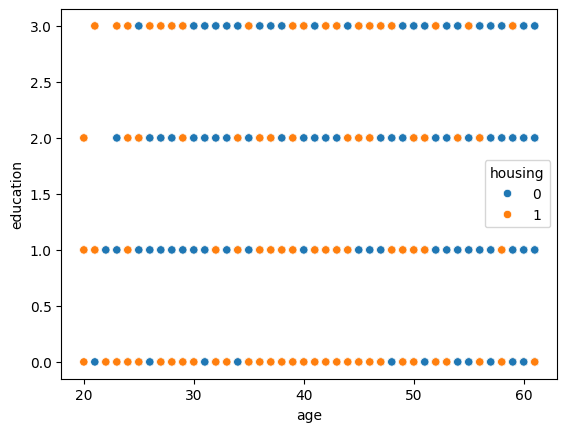

In [33]:
sns.scatterplot(x="age", y="education", hue="housing", data=data, legend="brief")
plt.show()

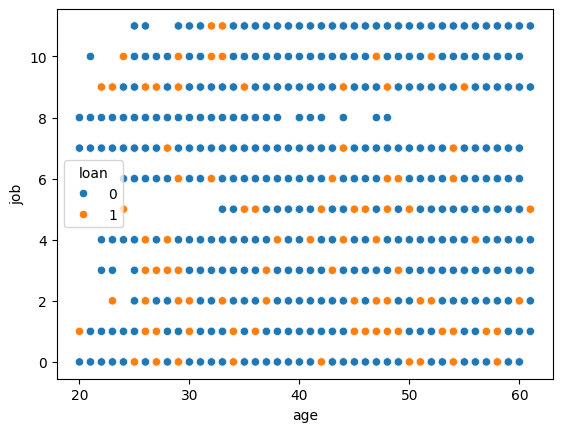

In [34]:
sns.scatterplot(x="age", y="job", hue="loan", data=data, legend="brief")
plt.show()

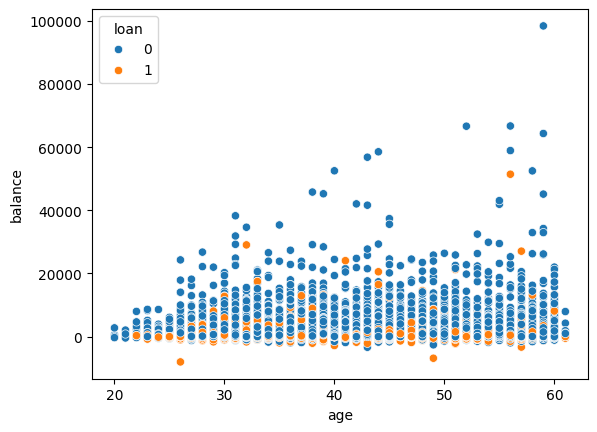

In [35]:
sns.scatterplot(x="age", y="balance", hue="loan", data=data, legend="brief")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
## divide the data into x and y or input or output variables
X= data.iloc[:, :-1]   ## independent variable set
y = data.iloc[:, -1]  ### dependent varable set

In [38]:
X

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
26372   34    2        1          2        0     7962        1     0        0   
26373   30    9        2          1        0     2153        0     0        1   
26374   45    0        0          1        0     8032        0     0        0   
26375   34    2        1          1        0      455        1     0        0   
26376   51    1        1          1        0     8180        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  
0        5      3     261.0       1.0   -1.0       0.0         3  
1        5      3     151.0       1.0   -1.0       0.0         3  
2        5      3      76.0       1.0   -1.0       0.0         3  
3        5      3      92.0       1.0   -1.0       0.0         3  
4        5      3     198.0       1.0   -1.0       0.0         3  
...    ...    ...       ...       ...    ...       ...       ...  
26372   20      4      96.0       2.0   -1.0       0.0         3  
26373   20      4      29.0       1.0   -1.0       0.0         3  
26374   20      4      73.0       1.0   -1.0       0.0         3  
26375   20      4      88.0       1.0   -1.0       0.0         3  
26376   20      4      86.0       1.0   -1.0       0.0         3  

[26377 rows x 16 columns]

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26372    0
26373    0
26374    0
26375    0
26376    0
Name: y, Length: 26377, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
predictions = model.predict(X_test_scaled)

In [44]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9541319181197877


In [45]:
data

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
26372   34    2        1          2        0     7962        1     0        0   
26373   30    9        2          1        0     2153        0     0        1   
26374   45    0        0          1        0     8032        0     0        0   
26375   34    2        1          1        0      455        1     0        0   
26376   51    1        1          1        0     8180        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  y  
0        5      3     261.0       1.0   -1.0       0.0         3  0  
1        5      3     151.0       1.0   -1.0       0.0         3  0  
2        5      3      76.0       1.0   -1.0       0.0         3  0  
3        5      3      92.0       1.0   -1.0       0.0         3  0  
4        5      3     198.0       1.0   -1.0       0.0         3  0  
...    ...    ...       ...       ...    ...       ...       ... ..  
26372   20      4      96.0       2.0   -1.0       0.0         3  0  
26373   20      4      29.0       1.0   -1.0       0.0         3  0  
26374   20      4      73.0       1.0   -1.0       0.0         3  0  
26375   20      4      88.0       1.0   -1.0       0.0         3  0  
26376   20      4      86.0       1.0   -1.0       0.0         3  0  

[26377 rows x 17 columns]

In [46]:
import pandas as pd
import numpy as np

In [48]:
print(f"Data type of x: {type(X)}")
print(f"Data type of y: {type(y)}")

Data type of x: <class 'pandas.core.frame.DataFrame'>
Data type of y: <class 'pandas.core.series.Series'>


In [49]:
## logistic regression and fit the model
classifier = LogisticRegression()  ## initilize the model i.e. called instance creation of class object.
# first create object 'classifier' for class logisticregression
classifier.fit(X,y)  ## then use this object to fit the model. this is the std methodology to build any algo. in sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
## predict for x
y_pred = classifier.predict(X)

In [51]:
## y_pred yhat values for x
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [53]:
## confusion matrix for to analyze how many wrong predctions are there in the table

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[24834   243]
 [  936   364]]


In [ ]:
## for accuracy
((24835+382)/(24835+242+981+382))*100

95.37443267776096

In [ ]:
## sir i dont include ROC curve beacuse i am stuck at one code while roc_curve  classifier.predict_proba
#  there i dont understand which value s
## we have to provide for predict_proba